# Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [2]:
def generate_examples(num=1000):
    W = [1.0,-3.0]
    b = 1.0
    
    W = np.reshape(W,(1,2))
    X = np.random.randn(2,num)
    Y = b+np.dot(W,X)
    Y = np.reshape(Y,(1,num))
    return X,Y

In [3]:
X,Y = generate_examples()

In [4]:
print(X.shape,Y.shape)

(2, 1000) (1, 1000)


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [5]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(1,num_features)
        self.b = np.random.randn()

In [6]:
model = Model(2)
print(model.W.shape)
print(model.b)

(1, 2)
-0.2835001227890104


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [7]:
class Model(Model):
    def forward_pass(self,X):
        Y_hat = self.b + np.dot(self.W,X)
        return Y_hat

In [8]:
Y_hat = Model(2).forward_pass(X)
print(Y_hat.shape)

(1, 1000)


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [9]:
class Model(Model):
    def com_loss(self,Y_hat,Y):
        return np.sum(np.square(Y_hat-Y))/(2*Y_hat.shape[1])
        

In [10]:
model = Model(2)
Y_hat = model.forward_pass(X)
loss = model.com_loss(Y_hat,Y)


In [11]:
loss


1.8813114546171037

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [12]:
class Model(Model):
    def back_pass(self,X,Y,Y_hat):
        m = Y.shape[1]
        db = (1/m)*np.sum(Y_hat - Y)
        dW = (1/m)*np.sum(np.dot((Y_hat - Y), X.T ), axis = 0)
        dW = np.reshape(dW,(self.W.shape[0],self.W.shape[1]))
        return dW,db
    
        

In [13]:
model = Model(2)
Y_hat = model.forward_pass(X)
loss = model.com_loss(Y_hat,Y)

dW,db = model.back_pass(X,Y,Y_hat)

In [14]:
print(dW,db)
print(dW.shape)

[[-0.8853528   3.81934994]] -1.5910278835769123
(1, 2)


# Task 7: Update Parameters

In [15]:
class Model(Model):
    def update_params(self,dW,db,lr):
        self.W = self.W - lr*dW
        self.b = self.b - lr*db
        

# Task 8: Training Loop

In [16]:
class Model(Model):
    def train(self,X_train,Y_train,itterations,lr):
        losses = []
        for i in range(0,itterations):
            Y_hat = model.forward_pass(X_train)
            loss = model.com_loss(Y_hat,Y_train)
            dW,db = model.back_pass(X_train,Y_train,Y_hat)
            self.update_params(dW,db,lr)
            losses.append(loss)
            if i%int(itterations/10)==0:
                print("Itter: {}, Loss: {:.4f}".format(i,loss))
        return losses
        

In [17]:
model = Model(2)

In [18]:
X_train,Y_train = X,Y

In [19]:
losses = model.train(X_train,Y_train,1000, 3e-3)


Itter: 0, Loss: 4.3569
Itter: 100, Loss: 2.4403
Itter: 200, Loss: 1.3675
Itter: 300, Loss: 0.7667
Itter: 400, Loss: 0.4300
Itter: 500, Loss: 0.2413
Itter: 600, Loss: 0.1355
Itter: 700, Loss: 0.0761
Itter: 800, Loss: 0.0427
Itter: 900, Loss: 0.0240


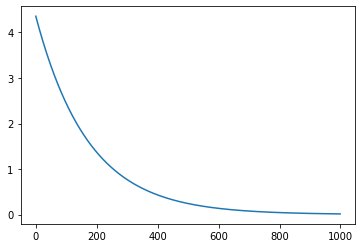

In [20]:
plt.plot(losses);

# Task 9: Predictions

In [21]:
model_untrained = Model(2)
X_test,Y_test = generate_examples(500)
print(X_test.shape,Y_test.shape)



(2, 500) (1, 500)


In [22]:
preds_untrained = model_untrained.forward_pass(X_test)
preds_trained = model.forward_pass(X_test)

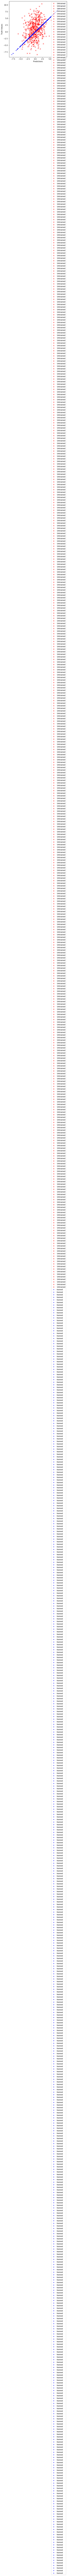

In [23]:
plt.figure(figsize = (6,6))
plt.plot(preds_untrained,Y_test,'rx',label = 'Untrained')
plt.plot(preds_trained,Y_test,'b.',label = 'trained')
plt.legend()
plt.xlabel("Predictions")
plt.ylabel("Truth Values")
plt.show()

In [24]:
print(model.W)

[[ 0.93887302 -2.8465124 ]]


In [25]:
df = pd.read_excel('chirps.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [26]:
x = df.X.values
y = df.Y.values
x = np.reshape(x, (1,x.shape[0]))
y = np.reshape(y, (1,y.shape[0]))
print(x.shape,y.shape)

(1, 15) (1, 15)


In [27]:
model = Model(1)
losses = model.train(x, y,200, 0.0001)

Itter: 0, Loss: 1204.5219
Itter: 20, Loss: 391.6337
Itter: 40, Loss: 131.7107
Itter: 60, Loss: 48.5996
Itter: 80, Loss: 22.0246
Itter: 100, Loss: 13.5271
Itter: 120, Loss: 10.8099
Itter: 140, Loss: 9.9410
Itter: 160, Loss: 9.6631
Itter: 180, Loss: 9.5741


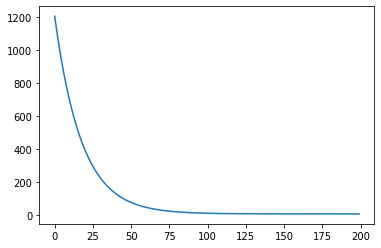

In [28]:
plt.plot(losses);

In [29]:
y_preds = model.forward_pass(x)

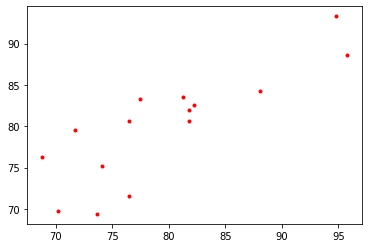

In [30]:
plt.plot(y_preds,y, 'r.');

In [31]:
print(model.W,model.b)

[[4.80784956]] -0.436298528093387
